In [31]:
import pandas as pd

In [43]:
df = pd.read_excel('Relevant_features2.xlsx')
print("excel file is read")

excel file is read


In [45]:
df.shape

(1613, 14)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   JV_reverse_scan_Voc               1604 non-null   float64
 1   JV_reverse_scan_Jsc               1603 non-null   float64
 2   JV_reverse_scan_FF                1603 non-null   float64
 3   JV_reverse_scan_PCE               1613 non-null   float64
 4   JV_forward_scan_Voc               1532 non-null   float64
 5   JV_forward_scan_Jsc               1532 non-null   float64
 6   JV_forward_scan_FF                1531 non-null   float64
 7   JV_forward_scan_PCE               1613 non-null   float64
 8   JV_default_PCE                    1613 non-null   float64
 9   Stabilised_performance_PCE        1613 non-null   float64
 10  Stability_time_total_exposure     743 non-null    float64
 11  Stability_PCE_end_of_experiment   738 non-null    float64
 12  Stabil

In [49]:
df.drop(['Stability_PCE_T80','Stability_time_total_exposure','Stability_PCE_end_of_experiment'] , axis = 1, inplace = True)

In [51]:
df.isnull().sum()

JV_reverse_scan_Voc                  9
JV_reverse_scan_Jsc                 10
JV_reverse_scan_FF                  10
JV_reverse_scan_PCE                  0
JV_forward_scan_Voc                 81
JV_forward_scan_Jsc                 81
JV_forward_scan_FF                  82
JV_forward_scan_PCE                  0
JV_default_PCE                       0
Stabilised_performance_PCE           0
Perovskite_composition_long_form     0
dtype: int64

In [53]:
df.shape

(1613, 11)

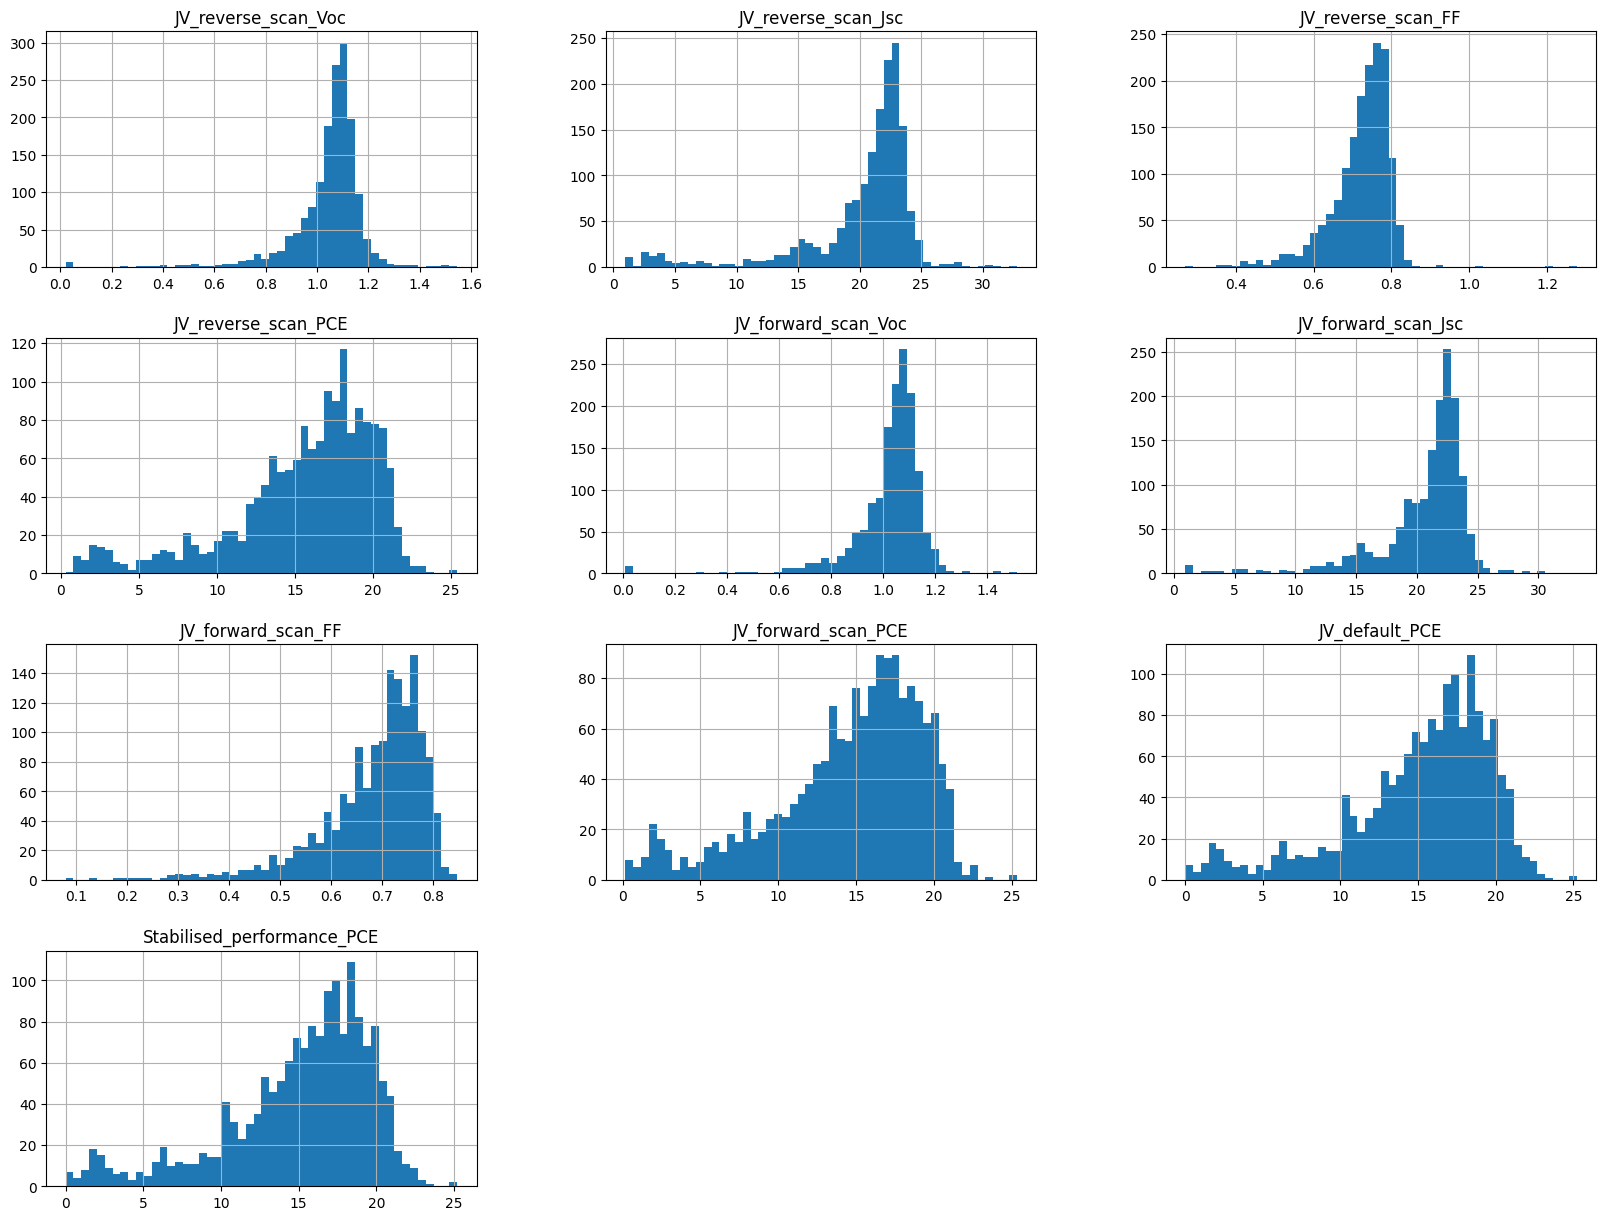

In [27]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

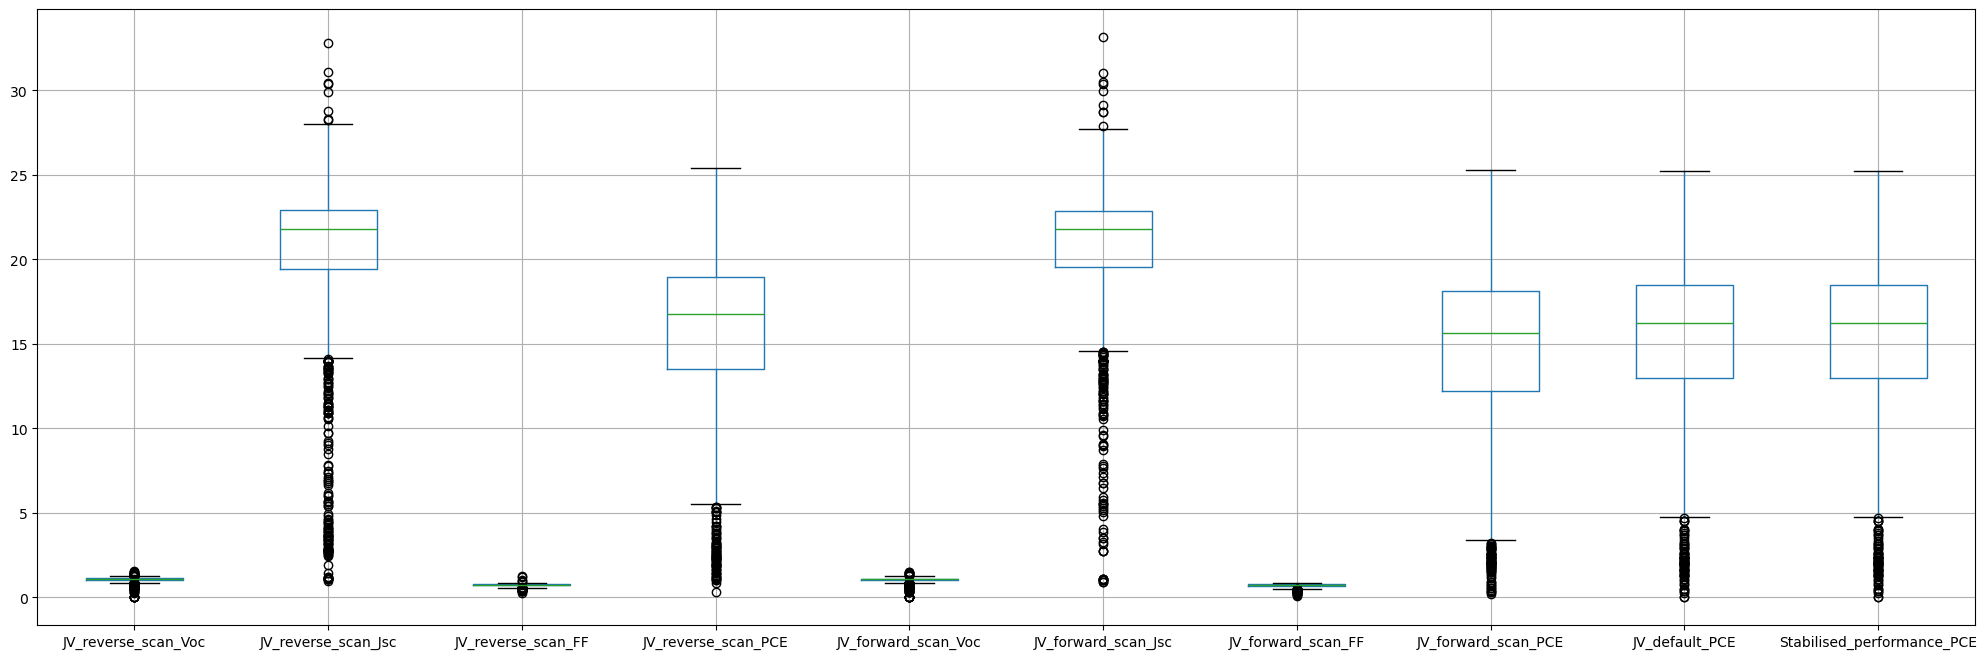

In [55]:
df_numeric = df.select_dtypes(include = ['number'])
df_numeric.boxplot(figsize = (25,8))  

In [57]:
# Function to remove outliers using IQR

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [59]:
# Remove outliers for each numeric column
for column in ['JV_reverse_scan_PCE', 'JV_forward_scan_PCE', 'Stabilised_performance_PCE']:
    df = remove_outliers(df, column)
print("outliers removed")

outliers removed


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1493 entries, 0 to 1612
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   JV_reverse_scan_Voc               1487 non-null   float64
 1   JV_reverse_scan_Jsc               1486 non-null   float64
 2   JV_reverse_scan_FF                1486 non-null   float64
 3   JV_reverse_scan_PCE               1493 non-null   float64
 4   JV_forward_scan_Voc               1463 non-null   float64
 5   JV_forward_scan_Jsc               1463 non-null   float64
 6   JV_forward_scan_FF                1462 non-null   float64
 7   JV_forward_scan_PCE               1493 non-null   float64
 8   JV_default_PCE                    1493 non-null   float64
 9   Stabilised_performance_PCE        1493 non-null   float64
 10  Perovskite_composition_long_form  1493 non-null   object 
dtypes: float64(10), object(1)
memory usage: 140.0+ KB


In [63]:
df.shape

(1493, 11)

In [65]:
df.isnull().sum()

JV_reverse_scan_Voc                  6
JV_reverse_scan_Jsc                  7
JV_reverse_scan_FF                   7
JV_reverse_scan_PCE                  0
JV_forward_scan_Voc                 30
JV_forward_scan_Jsc                 30
JV_forward_scan_FF                  31
JV_forward_scan_PCE                  0
JV_default_PCE                       0
Stabilised_performance_PCE           0
Perovskite_composition_long_form     0
dtype: int64

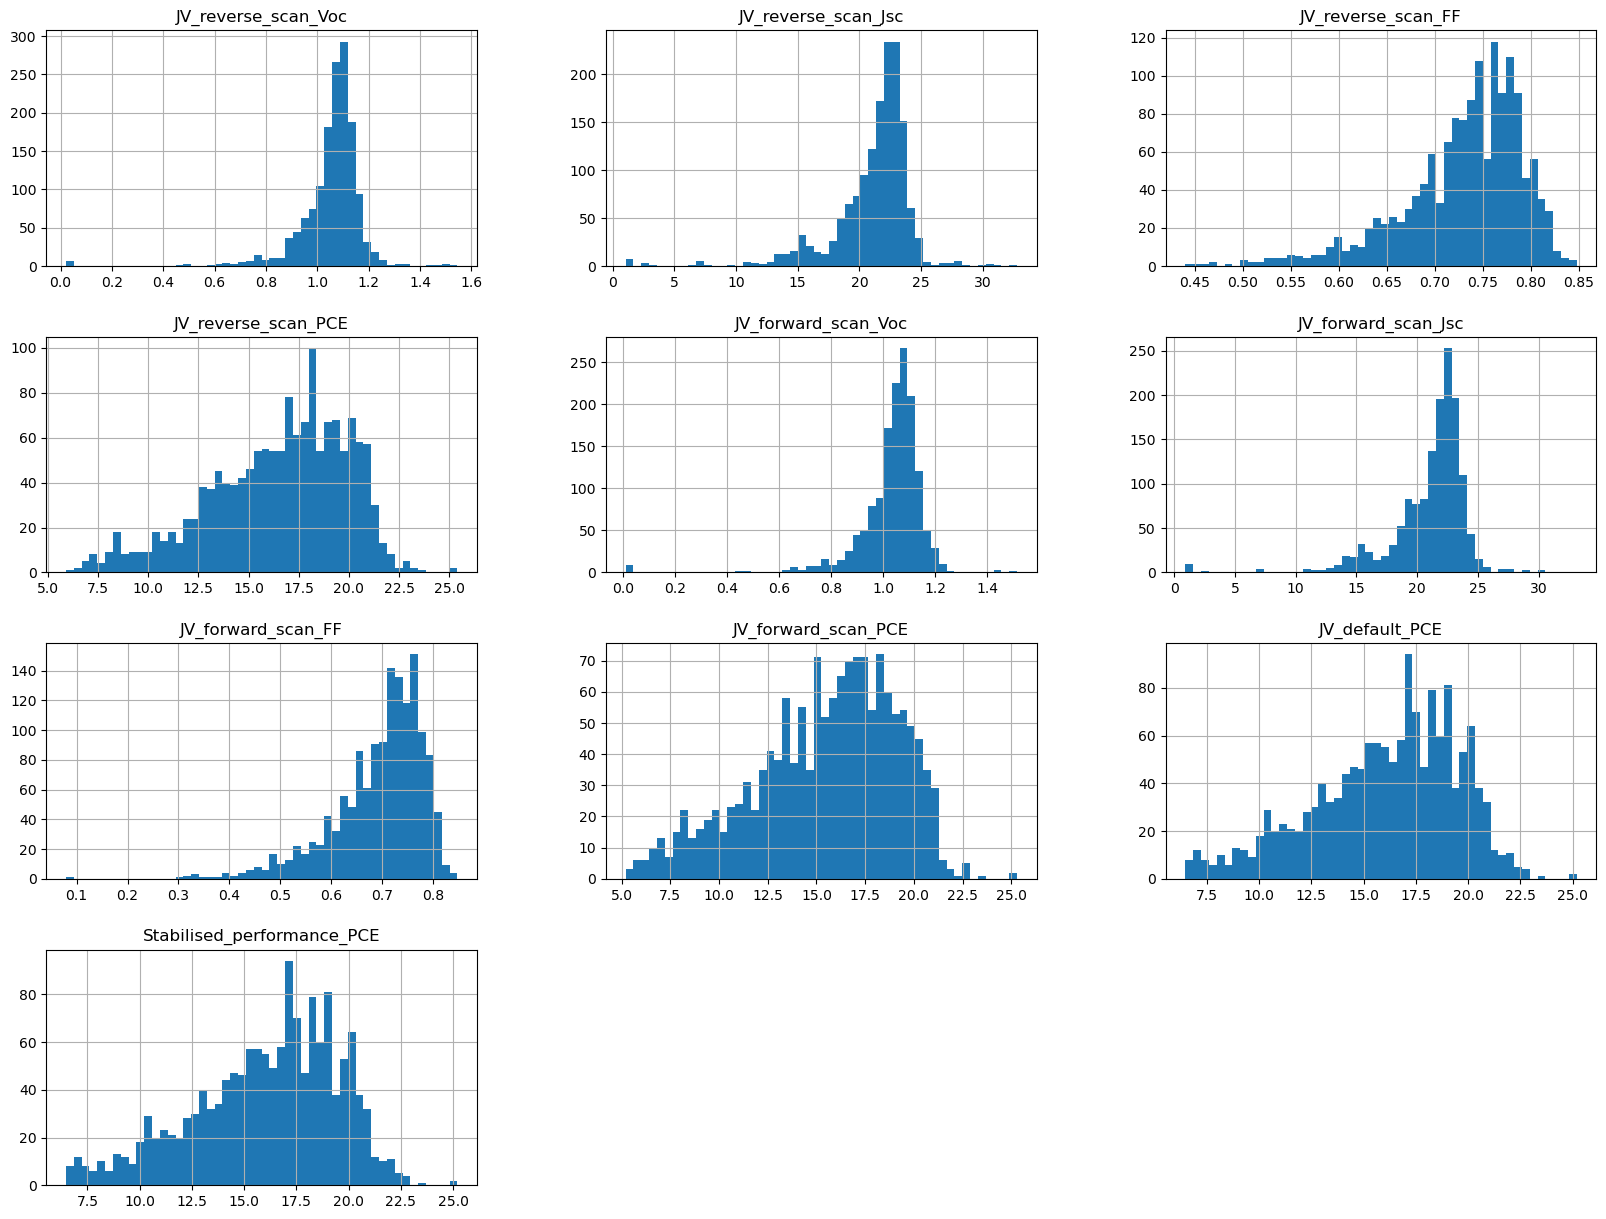

In [67]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [69]:
value_counts = df['Perovskite_composition_long_form'].value_counts()
print(value_counts)

Perovskite_composition_long_form
MAPbI3                             682
Cs0.05FA0.79MA0.16PbBr0.51I2.49     83
FA0.85MA0.15PbBr0.45I2.55           54
CsPbBrI2                            33
Cs0.05FA0.81MA0.14PbBr0.45I2.55     27
                                  ... 
Cs0.1FA0.7MA0.2Pb0.5Sn0.5I3          1
Cs0.09FA0.91PbBr0.12I2.88            1
Cs0.05FA0.75MA0.1PbBr0.3I2.9         1
FA0.83MA0.17PbBr0.33I2.67            1
Cs0.75FA0.25PbI3                     1
Name: count, Length: 289, dtype: int64


In [71]:
# Identify values that occur at least 5 times
valid_values = value_counts[value_counts >= 5].index

# Filter the DataFrame to keep only rows with these values
df_filtered = df[df['Perovskite_composition_long_form'].isin(valid_values)]
print("filtering completed")

filtering completed


In [73]:
df_filtered.shape

(1066, 11)

In [75]:
df = df_filtered
df.shape

(1066, 11)

In [77]:
df.isnull().sum()

JV_reverse_scan_Voc                  5
JV_reverse_scan_Jsc                  6
JV_reverse_scan_FF                   6
JV_reverse_scan_PCE                  0
JV_forward_scan_Voc                 22
JV_forward_scan_Jsc                 23
JV_forward_scan_FF                  24
JV_forward_scan_PCE                  0
JV_default_PCE                       0
Stabilised_performance_PCE           0
Perovskite_composition_long_form     0
dtype: int64

In [79]:
import numpy as np

def replace_outliers_with_null(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)
    return df


In [81]:
df.columns

Index(['JV_reverse_scan_Voc', 'JV_reverse_scan_Jsc', 'JV_reverse_scan_FF',
       'JV_reverse_scan_PCE', 'JV_forward_scan_Voc', 'JV_forward_scan_Jsc',
       'JV_forward_scan_FF', 'JV_forward_scan_PCE', 'JV_default_PCE',
       'Stabilised_performance_PCE', 'Perovskite_composition_long_form'],
      dtype='object')

In [83]:
for column in ['JV_reverse_scan_Voc', 'JV_reverse_scan_Jsc', 'JV_reverse_scan_FF',
       'JV_forward_scan_Voc', 'JV_forward_scan_Jsc',
       'JV_forward_scan_FF', 'JV_default_PCE'] :  
    df = replace_outliers_with_null(df, column)
print("outliers replaced")

outliers replaced


In [85]:
df.shape

(1066, 11)

In [87]:
df.isnull().sum()

JV_reverse_scan_Voc                 52
JV_reverse_scan_Jsc                 91
JV_reverse_scan_FF                  41
JV_reverse_scan_PCE                  0
JV_forward_scan_Voc                 71
JV_forward_scan_Jsc                 92
JV_forward_scan_FF                  53
JV_forward_scan_PCE                  0
JV_default_PCE                       6
Stabilised_performance_PCE           0
Perovskite_composition_long_form     0
dtype: int64

In [89]:
df2 = df.copy()
#df = df1

In [91]:
# Convert categorical variables (if any) to 'category' dtype
df['Perovskite_composition_long_form'] = df['Perovskite_composition_long_form'].astype('category')
# Ensure the index is reset to avoid issues
df = df.reset_index(drop=True)
print("step completed")


step completed


In [95]:
from miceforest import ImputationKernel
df['Perovskite_composition_long_form'] = df['Perovskite_composition_long_form'].astype('category')
df = df.reset_index(drop=True)

mice_kernel = ImputationKernel(
data = df,
save_all_iterations_data = True,
random_state = 2023
)
print("set up done!")

set up done!


In [97]:
mice_kernel.mice(2)
mice_imputation = mice_kernel.complete_data()
mice_imputation.head()

,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,JV_reverse_scan_PCE,JV_forward_scan_Voc,JV_forward_scan_Jsc,JV_forward_scan_FF,JV_forward_scan_PCE,JV_default_PCE,Stabilised_performance_PCE,Perovskite_composition_long_form
0,0.920,18.23,0.810,12.68,0.860,18.08,0.820,12.65,12.00,12.00,MAPbI3
1,0.960,20.37,0.780,9.49,1.066,19.85,0.790,9.46,9.00,9.00,MAPbI3
2,1.057,23.20,0.709,17.36,1.032,23.30,0.637,15.32,16.40,16.40,FAPbI3
3,1.080,21.75,0.750,17.60,1.080,21.65,0.750,17.58,17.14,17.14,MAPbI3
4,1.030,23.40,0.750,18.09,1.000,23.30,0.750,17.48,17.69,17.69,FA0.9MA0.1PbBr0.1I2.9


In [99]:
mice_imputation.isnull().sum()

JV_reverse_scan_Voc                 0
JV_reverse_scan_Jsc                 0
JV_reverse_scan_FF                  0
JV_reverse_scan_PCE                 0
JV_forward_scan_Voc                 0
JV_forward_scan_Jsc                 0
JV_forward_scan_FF                  0
JV_forward_scan_PCE                 0
JV_default_PCE                      0
Stabilised_performance_PCE          0
Perovskite_composition_long_form    0
dtype: int64

In [101]:
mice_imputation.to_excel('Cleaned_dataset.xlsx', index = False)
print("Saved to excel sheet")

Saved to excel sheet


In [103]:
print(mice_imputation.dtypes)

JV_reverse_scan_Voc                  float64
JV_reverse_scan_Jsc                  float64
JV_reverse_scan_FF                   float64
JV_reverse_scan_PCE                  float64
JV_forward_scan_Voc                  float64
JV_forward_scan_Jsc                  float64
JV_forward_scan_FF                   float64
JV_forward_scan_PCE                  float64
JV_default_PCE                       float64
Stabilised_performance_PCE           float64
Perovskite_composition_long_form    category
dtype: object
